In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Acc_vel_loc_sinrangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' no existe en el DataFrame.


In [3]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.


In [2]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   Link Indec        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  float64
 5   Accesos           18853 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB
None


Encontramos datos faltantes en accesos, por lo cual la diferencia encantidad de registros, sin embargo luego del análisis se determina la importancia de esto dentro del set de datos.

In [5]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [6]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']

Valores únicos en 'Partido' después de los reemplazos:
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'F

Al normalizar se unifican nombre de Provincias, Localidades y Partido.


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Provincia             Partido Localidad link Indec  \
count          18864               18864     18863      18864   
unique            23                 432      2775       2665   
top     BUENOS AIRES  GENERAL SAN MARTÍN     OTROS    6371010   
freq            7227                 460       132        367   
mean             NaN                 NaN       NaN        NaN   
std              NaN                 NaN       NaN        NaN   
min              NaN                 NaN       NaN        NaN   
25%              NaN                 NaN       NaN        NaN   
50%              NaN                 NaN       NaN        NaN   
75%              NaN                 NaN       NaN        NaN   
max              NaN                 NaN       NaN        NaN   

        Velocidad (Mbps)        Accesos  
count       18864.000000   18857.000000  
unique               NaN            NaN  
top                

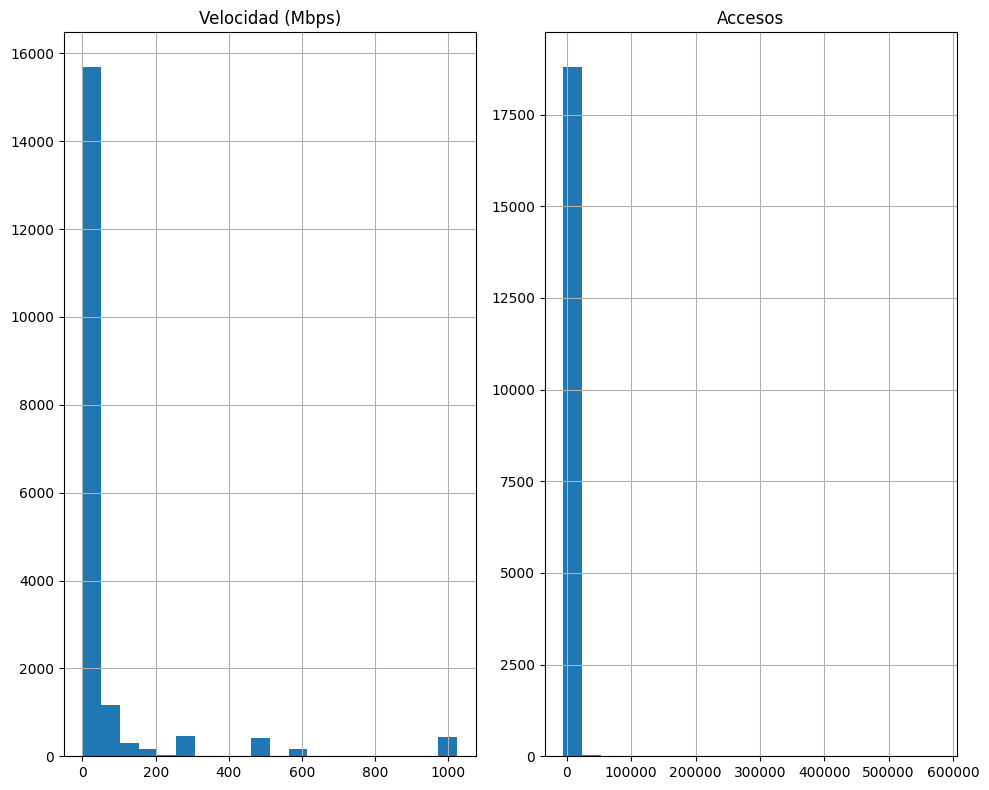

In [7]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

A partir de La estadística descriptiva observamos una amplia presencia de la provincia dde Buenos Aires, en los histogramas se observa velocidades menore a 200 Mbps, como la mas utilizada.


Matriz de correlación entre columnas numéricas:
                  Velocidad (Mbps)   Accesos
Velocidad (Mbps)          1.000000  0.037142
Accesos                   0.037142  1.000000


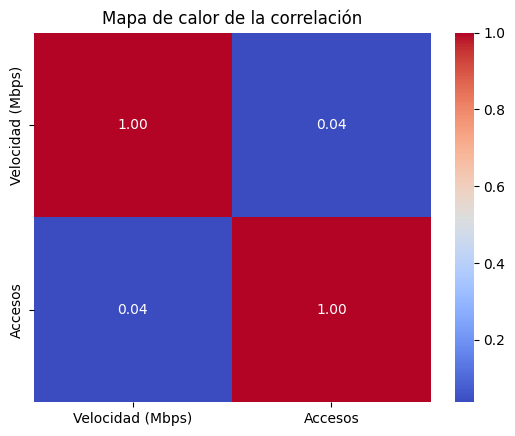

In [8]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


La correlación entre Velocidad (Mbps) y Accesos es 0.037, un valor muy cercano a 0, lo que significa que no hay una relación significativa entre estas dos variables en este caso.

In [9]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Partido:
Partido              12 DE OCTUBRE  1º DE MAYO  2 DE ABRIL  25 DE MAYO  \
Provincia                                                                
BUENOS AIRES                     0           0           0          49   
CATAMARCA                        0           0           0           0   
CHACO                           15          18           7          11   
CHUBUT                           0           0           0           0   
CORRIENTES                       0           0           0           0   
CÓRDOBA                          0           0           0           0   
ENTRE RÍOS                       0           0           0           0   
FORMOSA                          0           0           0           0   
JUJUY                            0           0           0           0   
LA PAMPA                         0           0           0           0   
LA RIOJA                         0           0           0     

La tabla de contingencia tiene como objetivo resumir la relación entre dos variables categóricas (en este caso, Provincia y Partido), La tabla nos muestra frecuencia no uniformes o nulas en algunos casos, la distribución de los datos se reflejan más en algunas provincias   La Concentración de datos se centra en Provincias como BUENOS AIRES y CHACO tienen mayor representación en comparación con otras como CATAMARCA o JUJUY.

In [10]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
       Velocidad (Mbps)  Accesos
0             -0.373590      NaN
1             -0.370796      NaN
2             -0.369400      NaN
3             -0.356829      NaN
4             -0.354035      NaN
...                 ...      ...
18859          0.185124      NaN
18860          1.302552      NaN
18861          2.419981      NaN
18862          2.978695      NaN
18863          5.213552      NaN

[18864 rows x 2 columns]


Los Z-scores son una medida estadística que indica cuántas desviaciones estándar se encuentra un valor respecto a la media de su distribución. 

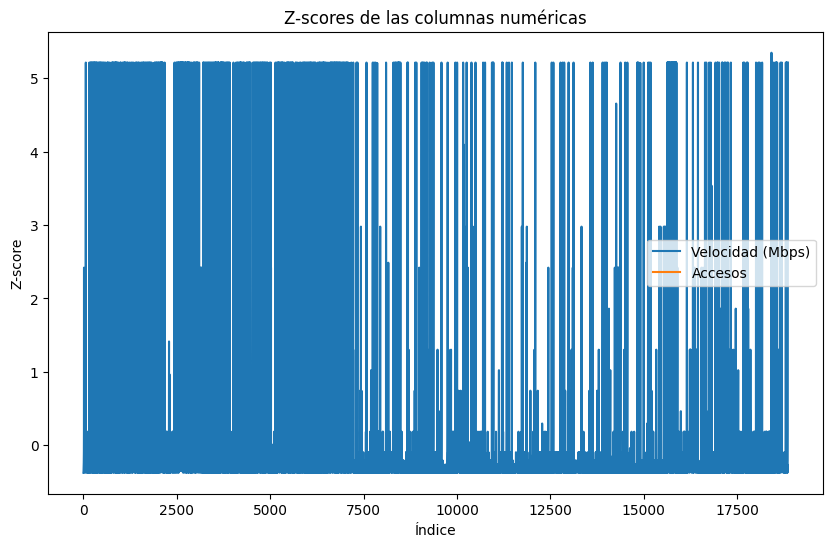

In [11]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


Los picos en la gráfica (donde los Z-scores suben mucho) pueden deberse a valores atípicos (outliers) en alguna de las columnas. Si los datos de una columna tienen valores extremadamente altos o bajos, el Z-score se incrementa considerablemente.
Esto puede indicar que en ciertos momentos o índices, los valores de alguna columna están lejos de la media, lo que podría requerir una revisión de los datos para determinar si esos valores son errores o si tienen una causa legítima.

In [12]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           7227
CÓRDOBA                2211
SANTA FE               1892
ENTRE RÍOS              747
MENDOZA                 706
SALTA                   612
RÍO NEGRO               510
SANTIAGO DEL ESTERO     500
LA PAMPA                474
MISIONES                403
CHACO                   398
TUCUMÁN                 377
NEUQUÉN                 342
CORRIENTES              325
SAN JUAN                311
CHUBUT                  304
FORMOSA                 302
JUJUY                   300
SAN LUIS                247
LA RIOJA                239
CATAMARCA               217
SANTA CRUZ              154
TIERRA DEL FUEGO         66
Name: count, dtype: int64

Conteo de categorías en la columna 'Partido':
Partido
GENERAL SAN MARTÍN     460
CAPITAL                373
LA MATANZA             340
SAN JUSTO              306
COLÓN                  286
                      ... 
LIHUEL CALEL             2
SAN LUIS DEL PALMAR      1


Observamos un amplio número de datos en Buenos Aires; Córdoba; Santa Fe.

In [13]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index(['Accesos'], dtype='object')


No existen Valores negativos

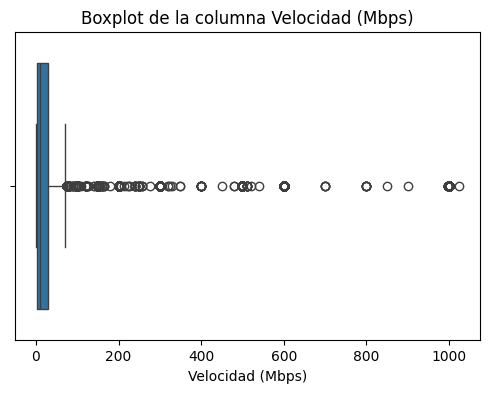

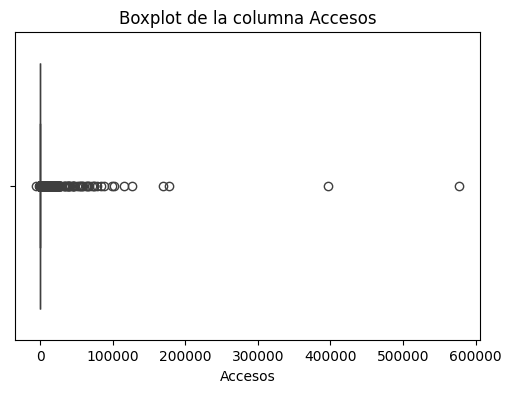

In [14]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

En el Boxplot de Velocidad  se observan valores muy altos y muy bajos, lo cual puede deberse a cambios en las tecnologías lo cual aumenta los rangos de velocidad, en el boxplot de Accesos posiblemente son dependientes del tiempo ya que deberia estar relacionado con el tiempo.

In [15]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Provincia           0
Partido             0
Localidad           1
link Indec          0
Velocidad (Mbps)    0
Accesos             7
dtype: int64


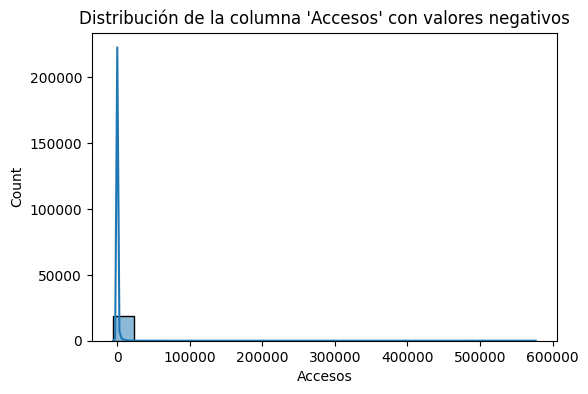

In [16]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [17]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")


Valores negativos en la columna 'Accesos': 4


In [18]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [19]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Provincia            0
Partido              0
Localidad            1
link Indec           0
Velocidad (Mbps)     0
Accesos             11
dtype: int64


In [20]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Acc_vel_loc_sinrangos.csv


In [21]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Velocidad (Mbps)     3.956047
Accesos             58.990600
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Velocidad (Mbps)      16.055486
Accesos             4682.215806
dtype: float64


El análisis de asimetría (skewness) y curtosis (kurtosis) ayuda a entender cómo se distribuyen los datos en las columnas numéricas de un DataFrame, proporcionando información adicional sobre la forma de las distribuciones. 

Velocidad (Mbps): 3.956

Este valor indica una asimetría positiva alta, es decir, la mayoría de los datos se encuentran en la parte baja del rango, pero hay valores extremos (colas largas) hacia la derecha.

Accesos: 58.990

Una asimetría extremadamente positiva. Esto sugiere que la mayoría de las provincias tienen muy pocos accesos, mientras que unas pocas tienen valores extremadamente altos que estiran la distribución hacia la derecha.

In [22]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
           Variable       VIF
0             const  1.146591
1  Velocidad (Mbps)  1.001386
2           Accesos  1.001386


 Se realiza un análisis de multicolinealidad entre las variables numéricas en un conjunto de datos. La multicolinealidad ocurre cuando dos o más variables independientes están altamente correlacionadas entre sí, lo que puede afectar la interpretación de modelos estadísticos como la regresión lineal.
Todas las variables tienen un VIF cercano a 1, lo que indica que no existe multicolinealidad significativa entre ellas.
Esto significa que las variables numéricas en este conjunto de datos son independientes y no están correlacionadas de manera que afecten negativamente un modelo predictivo.

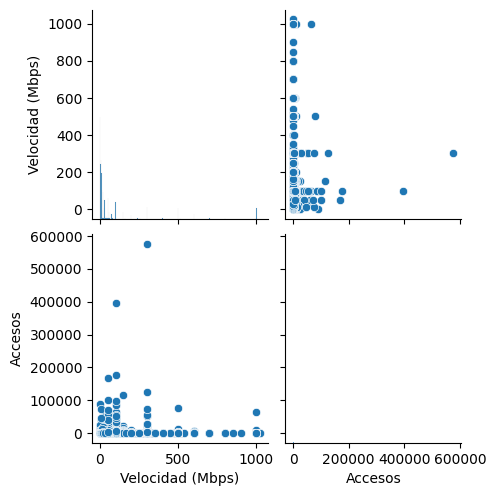

In [23]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

REsultado igual a la matriz de correlación.

In [24]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                    Velocidad (Mbps)                                       \
                               count        mean         std  min     25%   
Provincia                                                                   
BUENOS AIRES                  7227.0  110.431569  227.484573  0.0  4.0000   
CATAMARCA                      217.0   46.487097  132.032862  0.0  0.5120   
CHACO                          398.0   33.826693  119.344626  0.0  3.0000   
CHUBUT                         304.0   24.765961   97.345295  0.0  0.7500   
CORRIENTES                     325.0   28.174043  100.540561  0.0  1.0000   
CÓRDOBA                       2211.0   42.279112  137.712804  0.0  3.0000   
ENTRE RÍOS                     747.0   33.932182  125.458176  0.0  3.0000   
FORMOSA                        302.0   13.814079   66.801800  0.0  3.0000   
JUJUY                          300.0   26.930880   95.813400  0.0  3.0000   
LA PAMPA                       474.0

In [25]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                     Velocidad (Mbps)     Accesos
Provincia                                        
BUENOS AIRES               110.431569  894.000138
CATAMARCA                   46.487097  345.963134
CHACO                       33.826693  369.577889
CHUBUT                      24.765961  573.101974
CORRIENTES                  28.174043  487.012384
CÓRDOBA                     42.279112  491.078245
ENTRE RÍOS                  33.932182  394.518767
FORMOSA                     13.814079  208.443709
JUJUY                       26.930880  398.946667
LA PAMPA                    19.407586  260.048523
LA RIOJA                    30.836251  367.571429
MENDOZA                     35.997286  427.270538
MISIONES                    25.234551  512.540943
NEUQUÉN                     35.096673  478.192982
RÍO NEGRO                   36.351620  337.335294
SALTA                       35.149441  330.609195
SAN JUAN                    30.639260  340.803859
SAN LUIS  

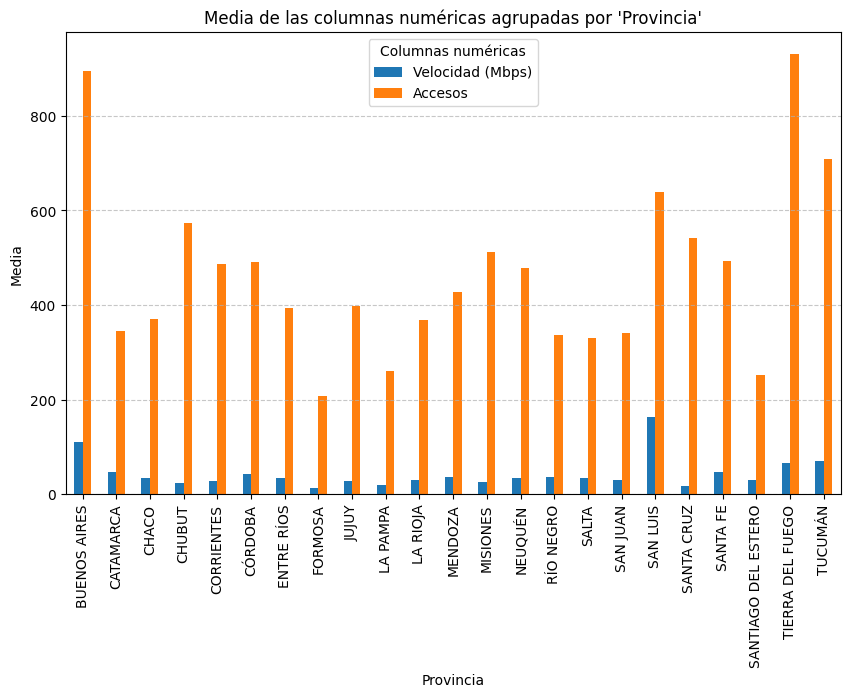


Estadísticas por grupo de 'Partido':
               Velocidad (Mbps)      Accesos
Partido                                     
12 DE OCTUBRE         10.066667    62.000000
1º DE MAYO             8.611111    39.444444
2 DE ABRIL            13.357143   111.571429
25 DE MAYO            23.289426   118.573770
9 DE JULIO            29.562810   186.853448
...                         ...          ...
ZAPALA                 9.989652   300.956522
ZONDA                 10.285714    50.142857
ZÁRATE                79.443548  1038.000000
ÑORQUINCÓ              1.875000     2.500000
ÑORQUÍN                3.973556    34.111111

[432 rows x 2 columns]


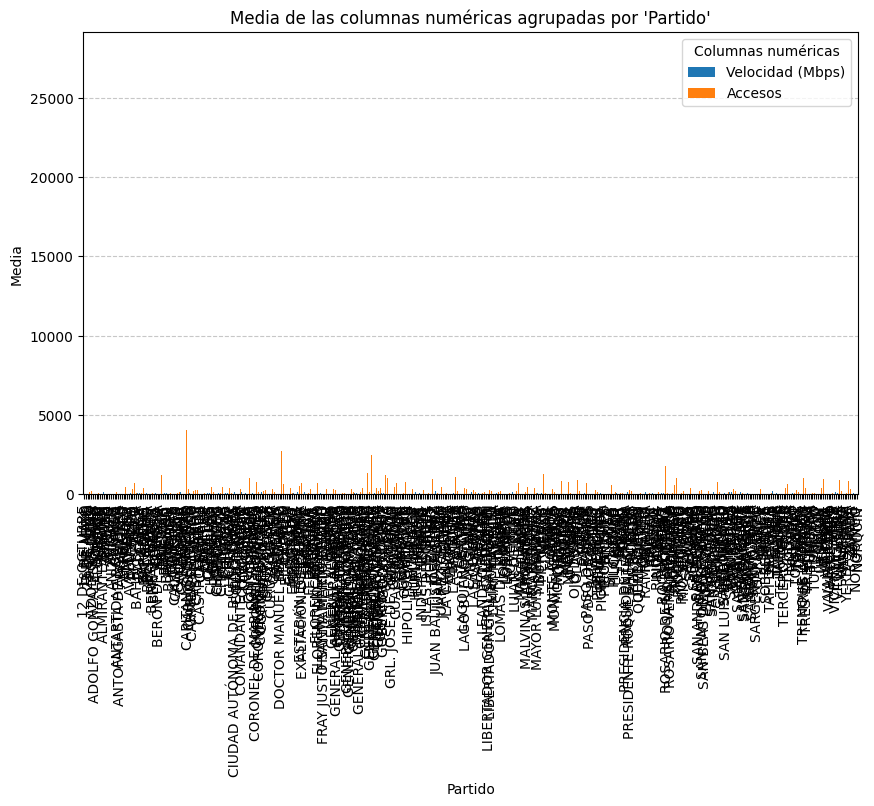


Estadísticas por grupo de 'Localidad':
                  Velocidad (Mbps)      Accesos
Localidad                                      
11 DE OCTUBRE            25.000000   225.000000
11 DE SEPTIEMBRE        163.214286    92.785714
12 DE OCTUBRE             3.000000    11.000000
1º DE MAYO                6.666667    46.333333
20 DE JUNIO             149.216667    51.666667
...                            ...          ...
ZÁRATE                   99.031250  1299.791667
ÁLVAREZ                   6.500000   255.333333
ÁRRAGA                    8.378000    21.750000
ÑANDUCITA                 0.000000    37.000000
ÑORQUINCÓ                 1.750000     3.500000

[2775 rows x 2 columns]


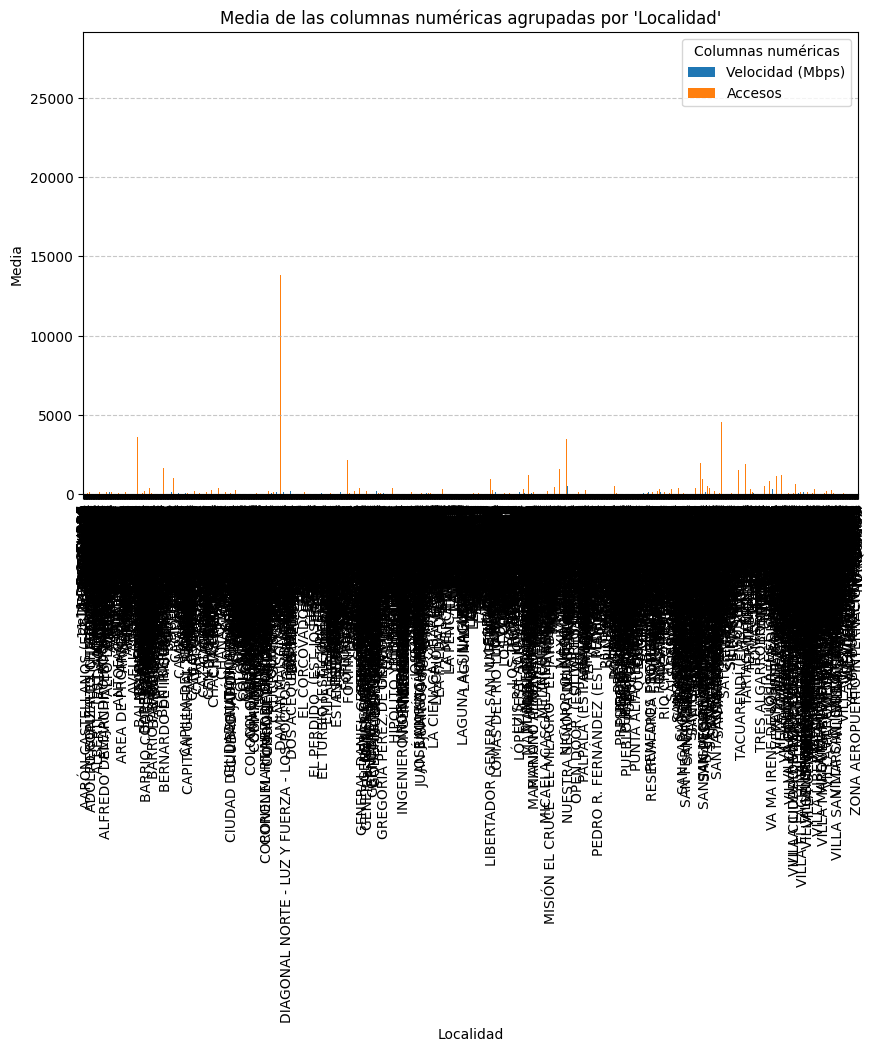


Estadísticas por grupo de 'link Indec':
            Velocidad (Mbps)      Accesos
link Indec                               
10007030            0.500000     1.000000
10007040            0.878000    38.250000
10007060            0.506000     2.500000
10007070            0.500000     1.000000
10007100            2.500000    33.000000
...                      ...          ...
94007010           29.552583  1359.291667
94007020            8.973556    39.777778
94014010            0.500000     1.000000
94014020           92.080786  1015.000000
Sin Datos          16.735507  1234.380597

[2665 rows x 2 columns]


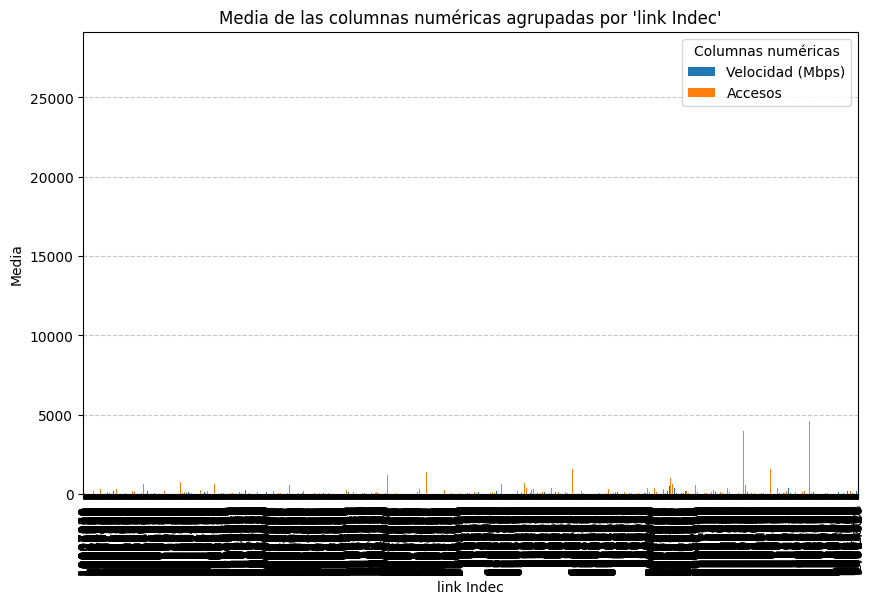

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
# Análisis de Datos de Accesos y Velocidades

Este Jupyter Notebook realiza un análisis exhaustivo de un conjunto de datos que contiene información sobre accesos y velocidades de internet en diferentes provincias y localidades.

## Contenido

1. **Carga y Normalización de Datos**
    - Carga del archivo CSV y verificación de su existencia.
    - Normalización de nombres de columnas y reemplazo de variaciones específicas.

2. **Transformaciones y Limpieza de Datos**
    - Conversión de la columna 'Trimestre' a tipo int64.
    - Creación de la columna 'Trimestre_Label' basada en 'Trimestre'.
    - Reemplazo de valores específicos en las columnas 'Provincia', 'Partido' y 'Localidad'.

3. **Análisis Exploratorio de Datos**
    - Estadísticas descriptivas y visualización de histogramas.
    - Cálculo y visualización de la matriz de correlación.
    - Tablas de contingencia para columnas categóricas.
    - Cálculo de Z-scores y visualización de gráficos de caja.

4. **Manejo de Valores Faltantes y Atípicos**
    - Reemplazo de valores negativos por NaN.
    - Visualización de la cantidad de valores nulos por columna.

5. **Análisis Estadístico Avanzado**
    - Cálculo de skewness y kurtosis.
    - Verificación de multicolinealidad usando VIF.
    - Visualización de relaciones entre variables numéricas.

6. **Agrupamiento y Estadísticas por Categorías**
    - Estadísticas descriptivas agrupadas por columnas categóricas.
    - Verificación de filas duplicadas.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- SciPy
- Statsmodels
- OS

## Uso

1. Asegúrate de tener instaladas todas las dependencias necesarias.
2. Coloca el archivo CSV en la ruta especificada en el notebook.
3. Ejecuta las celdas del notebook en el orden indicado para reproducir el análisis.

## Resultados

El notebook proporciona una visión detallada de los datos, incluyendo estadísticas descriptivas, visualizaciones y análisis de correlación. También se manejan valores faltantes y atípicos para asegurar la calidad de los datos.

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre un issue o envía un pull request para discutir cualquier cambio que te gustaría realizar.

## Licencia

Este proyecto está bajo la Licencia MIT.
"""

# Guardar el contenido en un archivo README.md
with open("README.md", "w", encoding="utf-8") as f:
     f.write(readme_content)

print("README.md generado exitosamente.")

In [ ]:
```markdown
## Observaciones y Conclusiones

- **Distribución de Datos**: La mayoría de los datos se concentran en la provincia de Buenos Aires, con una representación significativa también en Córdoba y Santa Fe. Esto puede indicar una mayor penetración de internet en estas áreas.

- **Velocidades de Internet**: Se observan velocidades de internet menores a 200 Mbps como las más comunes. Los valores atípicos en las velocidades pueden deberse a la adopción de nuevas tecnologías.

- **Accesos a Internet**: La mayoría de las provincias tienen pocos accesos, mientras que unas pocas tienen valores extremadamente altos. Esto sugiere una distribución desigual del acceso a internet.

- **Correlación**: No se encontró una relación significativa entre la velocidad de internet y el número de accesos, lo que indica que otros factores pueden estar influyendo en estas variables.

- **Valores Atípicos**: Los picos en los Z-scores indican la presencia de valores atípicos, que pueden ser errores o datos legítimos que requieren una revisión adicional.

- **Multicolinealidad**: No se encontró multicolinealidad significativa entre las variables numéricas, lo que sugiere que son independientes y no afectarán negativamente los modelos predictivos.

- **Valores Faltantes y Negativos**: Se manejaron adecuadamente los valores faltantes y negativos, reemplazándolos por NaN y asegurando la integridad de los datos.

Estas observaciones y conclusiones proporcionan una visión general del estado de los datos y pueden guiar futuras decisiones y análisis.
```